
# Project: Investigate TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we are going to investigate the TMDB movie datasets 
<ul>
This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.
    <li>Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|) characters.</li>
    <li>There are some odd charactersin the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.</li>
    <li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>




>These are the questions that can be answered by exploring the data :
 1. What are the top 10  movies with high profit ?
 
 2. How many movies are released each year ?

 3. what is the relation between rating and profit ?
 
 4. What are the top 10  movies with high rating (avg_vote)?

 5. Who is the most successful director that have good avg_rate?


>first step: let's import all necessary packages that are used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Lets load the data from the CSV file and see the head of datasets 

### General Properties

In [2]:
# Load data and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Wrangling and Data Cleaning 
>exploring data and see information about datasets 

In [3]:
#get numbers (rows and columns)
df.shape

(10866, 21)

In [4]:
#show datatype of each column and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>caculating the number of duplicate rows and drop its

In [5]:
sum(df.duplicated())

1

In [6]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True)

>datatype converting 

In [7]:
#column details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [8]:
#converting the datatype of release_date to datetime and converting budget & revenue to integer types
df['release_date']=pd.to_datetime(df['release_date'])
df['budget_adj']=df['budget_adj'].astype(int)
df['revenue_adj']=df['revenue_adj'].astype(int)

In [9]:
#column details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

>drop the rows which contain null values

In [10]:
#drop the rows which contain null values
df.dropna(subset=['genres'],axis=0 , inplace=True)

>drop unnecessary colums

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10842 non-null  int64         
 1   imdb_id               10834 non-null  object        
 2   popularity            10842 non-null  float64       
 3   budget                10842 non-null  int64         
 4   revenue               10842 non-null  int64         
 5   original_title        10842 non-null  object        
 6   cast                  10767 non-null  object        
 7   homepage              2931 non-null   object        
 8   director              10800 non-null  object        
 9   tagline               8036 non-null   object        
 10  keywords              9367 non-null   object        
 11  overview              10839 non-null  object        
 12  runtime               10842 non-null  int64         
 13  genres          

In [12]:
#dropping columns (production_companies)(cast)
df.drop(['cast','production_companies'],axis=1,inplace=True)

In [13]:
#dropping columns('tagline')('keywords')('id')('imdb_id')('homepage')('overview')
df.drop(['tagline','keywords','id','imdb_id','homepage','overview'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10842 non-null  float64       
 1   budget          10842 non-null  int64         
 2   revenue         10842 non-null  int64         
 3   original_title  10842 non-null  object        
 4   director        10800 non-null  object        
 5   runtime         10842 non-null  int64         
 6   genres          10842 non-null  object        
 7   release_date    10842 non-null  datetime64[ns]
 8   vote_count      10842 non-null  int64         
 9   vote_average    10842 non-null  float64       
 10  release_year    10842 non-null  int64         
 11  budget_adj      10842 non-null  int32         
 12  revenue_adj     10842 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(3)
memory usage: 1.1+ MB


>there 42 null value in director columns fill it by "no value"

In [15]:
sum(df.director.isnull())


42

In [16]:
#fill nan value ('no value')
df['director'].fillna('no value',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10842 non-null  float64       
 1   budget          10842 non-null  int64         
 2   revenue         10842 non-null  int64         
 3   original_title  10842 non-null  object        
 4   director        10842 non-null  object        
 5   runtime         10842 non-null  int64         
 6   genres          10842 non-null  object        
 7   release_date    10842 non-null  datetime64[ns]
 8   vote_count      10842 non-null  int64         
 9   vote_average    10842 non-null  float64       
 10  release_year    10842 non-null  int64         
 11  budget_adj      10842 non-null  int32         
 12  revenue_adj     10842 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(3)
memory usage: 1.1+ MB


In [18]:
df[['budget_adj','revenue_adj']].describe()


,budget_adj,revenue_adj
count,1.084200e+04,1.084200e+04
mean,1.758712e+07,4.973655e+07
std,3.433437e+07,1.427199e+08
min,0.000000e+00,-2.147484e+09
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.092507e+07,3.373330e+07
max,4.250000e+08,1.907006e+09


In [19]:
df[df['revenue_adj']<0]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977,39575591,-2147483648
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,240886902,-2147483648
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,271692064,-2147483648
10594,2.010733,8000000,441306145,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,1973-12-26,1113,7.2,1973,39289276,-2147483648


<a id='eda'></a>
## Exploratory Data Analysis


### 1-What are the top 10 grossing movies with high profit ?
>NOT THAT : 
<li>profit=revenue_adj - budget_adj</li>
<li>in datasets there are movies have 0 budget_adj (that moust skapped) </li>
<li>in datasets there are movies have 0 revenue_adj or less than(that moust skapped) </li>


In [20]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,4.973655e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.427199e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,-2.147484e+09
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.373330e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,1.907006e+09


In [21]:
# new column (profit)
df['profit'] = df['revenue_adj'] - df['budget_adj']


In [22]:
#new dataframe to skip data that must skipped to be fair
high_prof=df[ (df['revenue_adj'] > 0) & (df['budget_adj']> 0) ]

In [23]:
#list of top 10 movies with profit
high_prof=high_prof.sort_values('profit',ascending=False)
top_10_movies=high_prof[:10]
top_10_movies[['original_title','profit']]


,original_title,profit
9806,Jaws,1878643093
8889,E.T. the Extra-Terrestrial,1767968064
3,Star Wars: The Force Awakens,1718723210
8094,The Net,1551568265
10110,One Hundred and One Dalmatians,1545635295
7309,The Empire Strikes Back,1376997526
10398,The Jungle Book,1319404004
10223,Jurassic Park,1293766704
0,Jurassic World,1254445953
7269,The Godfather,1246626367


>bar graph of top 10 movies

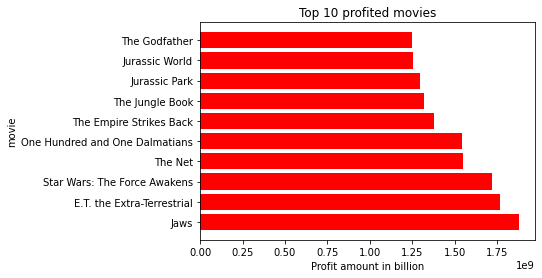

In [24]:
plt.barh(top_10_movies['original_title'],top_10_movies['profit'],color='red');
plt.title('Top 10 profited movies');
plt.xlabel('Profit amount in billion');
plt.ylabel('movie');

### How many movies are released each year ?

In [25]:
#Grouping all the rows by release year

year=df.groupby('release_year').count()
year = year.sort_values('profit',ascending=False)
year[:10].profit

release_year
2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
Name: profit, dtype: int64

>2014 have max number of movies

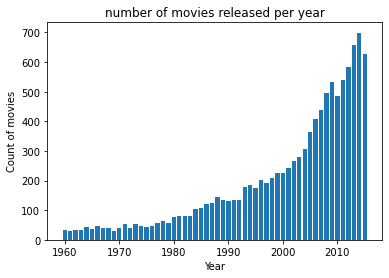

In [26]:
plt.bar(year.index,year.popularity);
plt.title('number of movies released per year');
plt.xlabel('Year');
plt.ylabel('Count of movies');

### what is the relation between rating and profit ?

<AxesSubplot:xlabel='profit', ylabel='vote_average'>

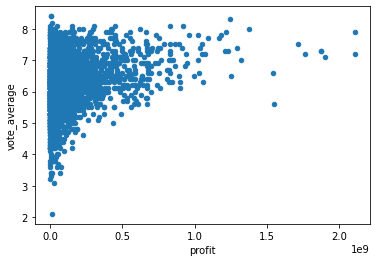

In [27]:
df[df['profit']>0].plot(kind='scatter',x='profit',y='vote_average')


>find corr between rating and profit 

In [28]:
df['profit'].corr(df['vote_average'])

0.2007559860096985

0.2 --> 0 that there no relation bettween  ['profit'] and ['vote_average']

### What are the top 10  movies with high rating (avg_vote)?
note: the mean of vote_count =217 i will skip all movies which vote count less than it to be fair 


In [29]:
df['vote_count'].describe()

count    10842.000000
mean       217.823649
std        576.180993
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

In [33]:
high_rate=df[ (df['vote_count'] > 217)]
high_rate=high_rate.sort_values('vote_average',ascending=False)
top_10_rate=high_rate[:10]
top_10_rate[['original_title','vote_average']]


,original_title,vote_average
4178,The Shawshank Redemption,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
4177,Pulp Fiction,8.1
9758,The Godfather: Part II,8.1
2875,The Dark Knight,8.1
10222,Schindler's List,8.1
4179,Forrest Gump,8.1
2409,Fight Club,8.1
826,Feast,8.0


The Shawshank Redemption is top rating movies

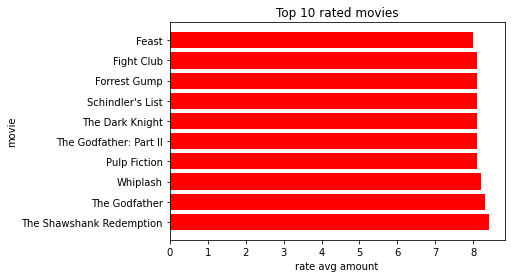

In [34]:
plt.barh(top_10_rate['original_title'],top_10_rate['vote_average'],color='red');
plt.title('Top 10 rated movies');
plt.xlabel('rate avg amount');
plt.ylabel('movie');

### Who is the most successful director that have good avg_rate?
To find the most succesful director:

In [35]:
bst_dir = df.groupby('director').mean()['vote_average'].sort_values(ascending=False)
bst_dir[0:10]

director
Mark Cousins                                   9.20
Derek Frankowski                               8.80
David Mallet                                   8.70
Martin Scorsese|Michael Henry Wilson           8.50
Saul Swimmer                                   8.50
Curt Morgan                                    8.50
D.A. Pennebaker|David Dawkins|Chris Hegedus    8.40
Jorge RamÃ­rez SuÃ¡rez                         8.40
Anthony Mandler                                8.40
Sam Dunn|Scot McFadyen                         8.35
Name: vote_average, dtype: float64

Mark Cousins with 9.20 average rateing  is the best 

<a id='conclusions'></a>
## Conclusions
<ul>
<li>jaws is movie with higest profit.</li>
<li>there no relation bettween  ['profit'] and ['vote_average']</li>
<li>2014 have max number of movies (699)</li>
<li>The Shawshank Redemption is top rating movies</li>
<li>Mark Cousins with 9.20 average rateing  is the best director</li>
</ul>

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295